### Problem 3

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

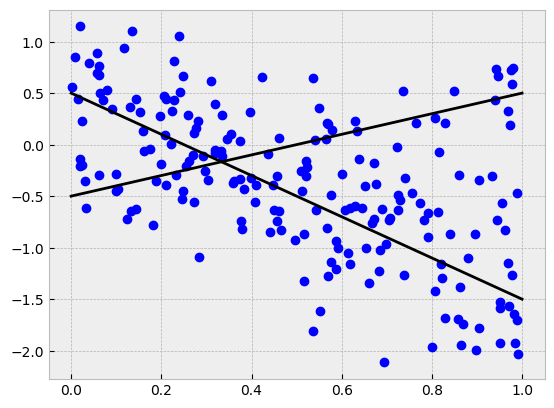

In [8]:
np.random.seed(0)
n = 200 #sample size
K = 2 #number of lines
e = np.array([0.7,0.3]) #mixing weights
w = np.array([-2,1]) #slopes of lines
b = np.array([0.5,-0.5]) #offsets of lines
v = np.array([0.2,0.1]) #variances
x = np.zeros([n])
y = np.zeros([n])
for i in range(0,n):
    x[i] = np.random.rand(1)
    if np.random.rand(1) < e[0]:
        y[i] = w[0]*x[i] + b[0] + np.random.randn(1)*np.sqrt(v[0])
    else:
        y[i] = w[1]*x[i] + b[1] + np.random.randn(1)*np.sqrt(v[1])
plt.plot(x,y,'bo')
t = np.linspace(0, 1, num=100)
plt.plot(t,w[0]*t+b[0],'k')
plt.plot(t,w[1]*t+b[1],'k')
plt.show()


In [9]:
e = np.array([.5 , .5])
w = np.array([1 ,-1])
b = np.array([0, 0])
v = np.array([np.var(y),np.var(y)])
def log_likelihood(e,w,b,v,x,y):
    tem = e[0]*norm.pdf(y,loc=w[0]*x+b[0],scale=np.sqrt(v[0]))+e[1]*norm.pdf(y, loc=w[1]*x+b[1],scale=np.sqrt(v[1]))
    return np.sum(np.log(tem))

#compute gamma0
def e_step(e,w,b,v,x,y):
    n = x.shape[0]
    gamma = np.zeros((2,n))
    p0 = e[0]*norm.pdf(y,loc=w[0]*x+b[0],scale=np.sqrt(v[0]))
    p1 = e[1]*norm.pdf(y,loc=w[1]*x+b[1],scale=np.sqrt(v[1]))
    gamma[0,:] = p0/(p0+p1)
    gamma[1,:] = 1-gamma[0]
    return gamma

#update e,w,v
def m_step(w,b,v,x,y,gamma):
    newe = np.zeros(2)
    newv = np.zeros(2)
    neww = np.zeros(2)
    newb = np.zeros(2)
    
    newe = np.average(gamma,1)
    sumgamma = np.sum(gamma,1)
    for i in range(2):
        newv[i] = np.sum(gamma[i]*(y-w[i]*x-b[i])**2)/sumgamma[i]
        neww[i] = np.sum(gamma[i]*x*(y-b[i]))/np.sum(gamma[i]*x**2)
        newb[i] = np.sum(gamma[i]*(y-w[i]*x))/sumgamma[i]
#         neww[i] = (y*x)@gamma[i].T/(gama[i]@(x.T@x))
#         newb[i] = 
    return newe, newv, neww, newb


In [10]:
likilylist = []
likilylist.append(log_likelihood(e,w,b,v,x,y))
while True:
    gamma = e_step(e,w,b,v,x,y)
    e,v,w,b = m_step(w,b,v,x,y,gamma)
    likilylist.append(log_likelihood(e,w,b,v,x,y))

    if len(likilylist) > 2 and likilylist[-1] - likilylist[-2] < 1e-4:
        break

In [11]:
iternum = len(likilylist)-1
print("iterations number:",iternum)
print("w:",w,'\nb:',b,'\nv:',v,'\ne:',e,'\n')

iterations number: 113
w: [ 1.09551956 -1.91621731] 
b: [-0.53836472  0.50517861] 
v: [0.04028894 0.25309761] 
e: [0.18000282 0.81999718] 



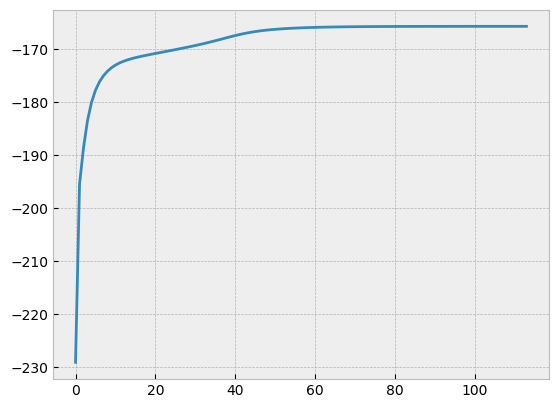

In [12]:
xx = np.arange(iternum+1)
plt.plot(xx,likilylist)
plt.savefig("33")

In [13]:
eo = np.array([0.7,0.3]) #mixing weights
wo = np.array([-2,1]) #slopes of lines
bo = np.array([0.5,-0.5]) #offsets of lines
vo = np.array([0.2,0.1]) #variances

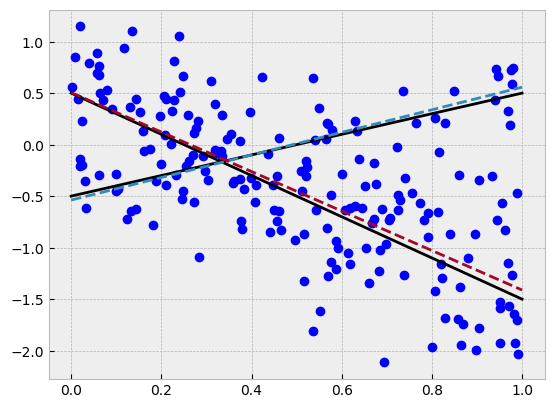

<Figure size 640x480 with 0 Axes>

In [14]:
plt.plot(x,y,'bo')
t = np.linspace(0, 1, num=100)
plt.plot(t,wo[0]*t+bo[0],'k')
plt.plot(t,wo[1]*t+bo[1],'k')
plt.plot(t,w[0]*t+b[0],'--')
plt.plot(t,w[1]*t+b[1],'--')
plt.show()
plt.savefig('35')